# Применение методов безусловной оптимизации на практике

## Постановка задачи

\begin{equation}
\begin{split}
& \min_{x \in \operatorname{dom}(f)}\left\{f(x)\right\}
\end{split}
\end{equation}
где $\operatorname{dom}(f) \subseteq \mathbb{R}^n$

Функция, как минимум, непрерывна. Рассматриваются задачи **нелинейной** оптимизации, являющиеся в их самой общей форме **численно неразрешимыми**!

## Аналитические результаты
- Необходимое условие экстремума первого порядка: 
если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда 
$$
\nabla f(x^*) = 0
$$

## Зачем нужны численные методы?

- Для задач большой размерности аналитическое выражение может быть трудно вычислить
- Чаще всего аналитического выражения для решения нет

## Как создаются численные методы?

- Способы численного решения уравнений из условий оптимальности
- Замена целевой функции её простой аппроксимацией
- Сведение условных задач к безусловным с сохранением множества решений

## Общий метод

- Заданы начальная точка и точность решения
- По некоторому правилу меняем данную точку на другую так, чтобы спустя какое-то число итераций достичь точки минимума целевой функции с заданной точностью

#### Критерии остановки
1. Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Сходимость по функции: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Выполнение необходимого условия 
$$
\| \nabla f(x_k) \|_2 < \varepsilon
$$

Но ведь $x^*$ неизвестна!

Тогда

\begin{align*}
& \|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq \\
& \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
\end{align*}

Аналогично для сходимости по функции, однако иногда можно оценить $f^*$! 

**Замечание**: лучше использовать относительные изменения 

этих величин! 

Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


## Как сравнивать методы оптимизации?
Для заданного класса задач сравнивают следующие величины:
1. **Арифметическая/Временная сложность**: общее число всех _вычислений_, необходимых для решения задачи с точностью $\varepsilon$
2. **Аналитическая/Оракульная сложность**: число _обращений_, необходимых для решения задачи с точностью $\varepsilon$
3. Скорость сходимости
4. Эксперименты

### Скорости сходимости 

| | | | |
|:---:|:---:|:---:|:---:|
|**Сублинейная**|**Линейная** (геометрическая прогрессия)|**Сверхлинейная** |**Квадратичная**|
|\begin{gather}
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha}\\ \alpha < 0,\; \\  0 < C < \infty\end{gather}| \begin{gather}
\| x_{k+1} - x^* \|_2 \leq Cq^k \\ q \in (0, 1),\; \\ 0 < C < \infty \end{gather}| \begin{gather}
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, \\ q \in (0, 1), \; p > 1, \; \\ 0 < C < \infty\end{gather}| \begin{gather}
\| x_{k+1} - x^* \|_2 \leq C q^{2^k} \qquad \text{или} \\ \| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \\ q \in (0, 1),\; \\ 0 < C < \infty\end{gather}|


Ниже закомментирован код установки библиотеки методов оптимизации, использованной в последующих примерах

In [ ]:
#!pip install git+https://github.com/amkatrutsa/liboptpy

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipywidg
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
import cvxpy as cvx
import scipy.optimize as scopt
import seaborn as sns
import sklearn.datasets as skldata
import scipy.special as scspec
import liboptpy.restarts as restarts
import liboptpy.base_optimizer as base
import liboptpy.unconstr_solvers.fo as fo


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
sns.set_context("talk")

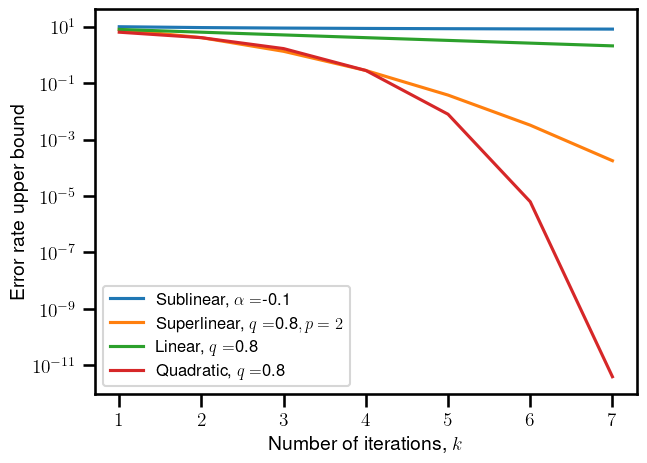

In [13]:
C = 10
alpha = -0.1
q = 0.8
num_iter = 7
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])

plt.figure(figsize=(7, 5))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = $" + f"{alpha}")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = $" + f"{q}" + r"$, p = 2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = $" + f"{q}")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = $" + f"{q}")
plt.xlabel("Number of iterations, $k$", fontsize=14)
plt.ylabel("Error rate upper bound", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### Классификация задач безусловной оптимизации
    - функция липшицева
    - градиент целевой функции липшицев
    - выпуклая функция
    - сильно выпуклая функция

## Классификация методов

1. Методы нулевого порядка: дано значение функции $f(x)$

2. Методы первого порядка: дано значение функции $f(x)$ и её градиент $f'(x)$

3. Методы второго порядка: дано значение функции $f(x)$, её градиент $f'(x)$ и гессиан $f''(x)$.

...



1. Одношаговые методы 
$$
x_{k+1} = \Phi(x_k)
$$
2. Многошаговые методы
$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## Что такое методы спуска?

Последовательность $x_k$ генерируется по правилу
$$
x_{k+1} = x_k + \alpha_k h_k
$$
так что
$$
f(x_{k+1}) < f(x_k)
$$
Направление $h_k$ называется *направлением убывания*.

**Замечание**: существуют методы, которые не требуют монотонного убывания функции от итерации к итерации.

## Лучшее направление локального убывания
Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ вдоль некоторого направления убывания $h, \|h\|_2 = 1$:
$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$
Из условия убывания
$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$
и переходя к пределу при $\alpha \rightarrow 0$:
$$
\langle f'(x), h \rangle < 0
$$
Также из неравенства Коши-Буняковского-Шварца
$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Таким образом, направление антиградиента 
$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$
даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид
$$
x_{k+1} = x_k - \alpha_k f'(x_k)
$$

## (*) Схема Эйлера решения ОДУ

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t))
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $\alpha = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - \alpha f'(x_k),
$$
которое в точности совпадает с выражением для градиентного спуска.

Такая схема называется **явной** или **прямой схемой Эйлера**.

## Итого: метод градиентного спуска &mdash; дёшево и сердито
```python
def GradientDescentMethod(f, x0, epsilon, **kwargs):
    x = x0
    while StopCriterion(x, f, **kwargs) > epsilon:
        h = ComputeGradient(x, f, **kwargs)
        alpha = SelectStepSize(x, h, f, **kwargs)
        x = x - alpha * h
    return x

```

## Как выбрать шаг $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

Список подходов:
- Постоянный шаг 
$$
\alpha_k = \overline{\alpha}
$$
- Априорно заданная последовательность, например
$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$
- Наискорейший спуск
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

- Требование **достаточного** убывания, требование **существенного** убывания и условие кривизны: для некоторых $\beta_1, \beta_2$, таких что $0 < \beta_1 < \beta_2 < 1$ найти $x_{k+1}$ такую что

    - Достаточное убывание: $f(x_{k+1}) \leq f(x_k) + \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$
    - Существенное убывание: $f(x_{k+1}) \geq f(x_k) + \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$
    - Условие кривизны: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Обычно коэффициенты выбирают так: $\beta_1 \in (0, 0.3)$, а $\beta_2 \in (0.9, 1)$

### Анализ и мотивация подходов к выбору шага $\alpha_k$
- Постоянный шаг: самое простое решение, которое может быть неэффективным 
- Априорно заданная последовательность: немногим лучше постоянного шага
- Наискорейший спуск: самое лучшее решение, но применимо только если вспомогательная задача решается аналитически или ооооооочень быстро. <br>

- Требование достаточного убывания, требование существенного убывания и условие кривизны:
    - требование достаточного убывания гарантирует, что функция в точке $x_{k+1}$ не превосходит линейной аппроксимации с коэффициентом наклона $\beta_1$
    - требование существенного убывания гарантирует, что функция в точке $x_{k+1}$ убывает не меньше, чем линейная аппроксимация c коэффициентом наклона $\beta_2$
    - условие кривизны гарантирует, что угол наклона касательной в точке $x_{k+1}$ не меньше, чем угол наклона касательной в точке $x_k$, умноженный на $\beta_2$ 

Требование существенного убывания и условие кривизны обеспечивают убывание функции по выбранному направлению $h_k$. Обычно выбирают одно из них.

#### Альтернативные названия
- Требование достаточного убывания $\equiv$ правило Армихо
- Требование достаточного убывания + условие кривизны $\equiv$ правило Вольфа
- Требование достаточного убывания + требование существенного убывания $\equiv$ правило Гольдштейна

## Зачем нужно условие существенного убывания?

In [14]:
f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.clf()

def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    plt.plot(x, f(x), color="r", label="$f(x) = x^2$")
    plt.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
ipywidg.interact(update, x0=x0_slider, step=step_slider)

<Figure size 640x480 with 0 Axes>

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(valu…

<function __main__.update(x0, step)>

In [16]:
def plot_alpha(f, x, h, alphas):
    df = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        df[i] = f(x + alpha * h)
    plt.plot(alphas, df)
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.ylabel(r"$f(x + \alpha h)$", fontsize=18)
    plt.show()

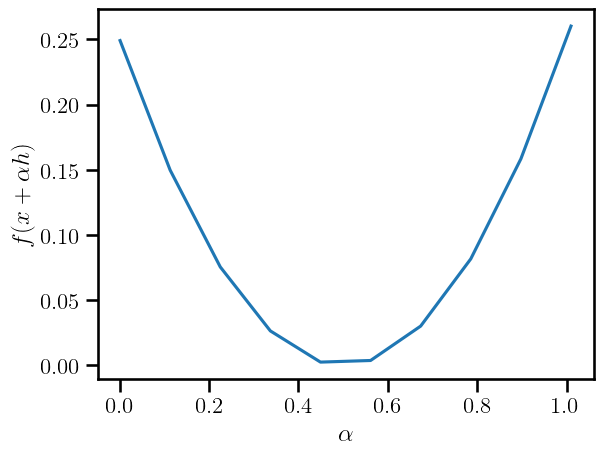

In [17]:
plot_alpha(lambda x: x**2, 0.5, -1, np.linspace(1e-3, 1.01, 10))

### Backtracking 

```python
def SelectStepSize(x, f, h, rho, alpha0, beta1, beta2):
    # 0 < rho < 1
    # alpha0 - initial guess of step size
    # beta1 and beta2 - constants from conditions
    alpha = alpha0
    # Check violating sufficient decrease and curvature conditions 
    while (f(x - alpha * h) >= f(x) + beta1 * alpha grad_f(x_k).dot(h)) and 
          (grad_f(x - alpha * h).dot(h) <= beta2 * grad_f(x_k).dot(h)):
        alpha *= rho
    return alpha
```

## Теоремы сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 4;  гл. 3, $\S$ 1; Ю.Е. Нестеров Введение в выпуклую оптимизацию, $\S$ 2.2)
От общего к частному:

**Теорема 1.** 
Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

**Теорема 2.** Пусть
- $f(x)$ дифференцируема на $\mathbb{R}^n$
- $f(x)$ выпукла 
- $f'(x)$ удовлетворяет условию Липшица с константой $L$
- $\alpha = \dfrac{1}{L}$

Тогда 
$$
f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
$$

**Теорема 3.**
Пусть

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ является сильно выпуклой с константой $\mu$
- $\alpha = \dfrac{2}{\mu + L}$

Тогда для градиентного метода выполнено:
$$
\| x_k - x^* \|^2_2 \leq \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^k \|x_0 - x^*\|^2_2 \qquad f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $\kappa = \frac{L}{\mu}$

### От чего зависит $q^*$ и как это использовать?

Из Теоремы 3 имеем 
$$
q^* = \dfrac{L - \mu}{L + \mu} = \dfrac{L/\mu - 1}{L/\mu + 1} = \dfrac{\kappa - 1}{\kappa + 1},
$$
где $\kappa$ - оценка числа обусловленности $f''(x)$.

- При $\kappa \gg 1$, $q^* \to 1 \Rightarrow$ оооочень **медленная** сходимости градиентного метода. Например при $\kappa = 100$: $q^* \approx 0.98 $
- При $\kappa \simeq 1$, $q^* \to 0 \Rightarrow$ **ускорение** сходимости градиентного метода. Например при $\kappa = 4$: $q^* = 0.6 $

**Мораль**: необходимо сделать оценку $M$ как можно ближе к 1!

## Выбор начального приближения

Обратите внимание, что ни в одной из теорем приведённых выше не было условий на начальное приближение $x_0$!

- Для невыпуклой функции градиентный спуск сойдётся к некоторой стационарной точке, которая может быть как локальным минимумом, так и седловой точкой 
- Однако как [недавно стало известно](https://pdfs.semanticscholar.org/9dd7/05a9974c6ac7bb8a32d89ce2841bb1ac66af.pdf) почти наверно сойдётся к точке минимума
- Для выпуклых функций стационарная точка будет точкой минимума
- Способы выбора начального приближения:
    - случайная точка
    - безградиентные методы случайного поиска, например [эволюционный алгоритм](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.differential_evolution.html), алгоритм муравьиной колонии (ant colony) и т.д.
    - обычно эти методы могут дать лишь незначительное уменьшение функции, однако сильно отойти от локальных минимумов

## Вычислительный аспект и эксперименты
1. Для каждого шага метода нужно хранить только текущую точку и вектор градиента: $O(n)$ памяти
2. Поиск $\alpha_k$:
    - дан априори
    - ищется из аналитического решения задачи наискорейшего спуска
    - заканчивается за конечное число шагов
3. Для каждого шага метода нужно вычислять линейную комбинацию векторов: $O(n)$ вычислений + высокопроизводительные реализации

### Pеализация градиентного спуска

In [7]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        alpha = line_search(x, -gradient, **opt_arg)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

### Зависимость от обусловленности матрицы $f''(x)$
Рассмотрим задачу 
$$
\min f(x),
$$ 
где
$$ f(x) = x^{\top}Ax, \; A = \begin{bmatrix} 1 & 0\\ 0 & \gamma \end{bmatrix} $$

$$
f'(x) = 2Ax
$$

In [8]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

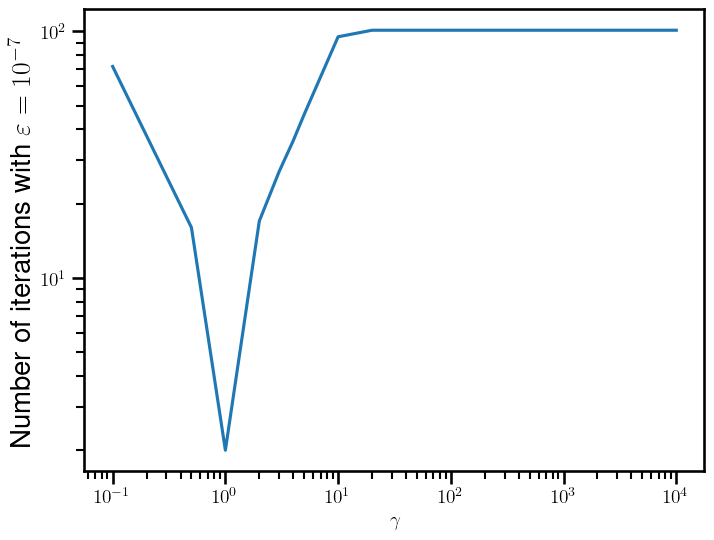

In [9]:
gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
#     x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
    x0 = np.array([g, 1], dtype=np.float64)
    gd = methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd.solve(x0, tol=1e-7, max_iter=100)
    num_iter_converg.append(len(gd.get_convergence()))

plt.figure(figsize=(8, 6))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(r"$\gamma$", fontsize=14)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)
plt.show()

- При неудачном начальном приближении сходимость для плохо обусловенной задачи очень медленная
- При случайном начальном приближении сходимость может быть гораздо быстрее теоретических оценок
- **Open problem:** получить оценки сходимости, использующие случайное начальное приближение, а не худшее из возможных

## Эксперимент на многомерной задаче
Пусть $A \in \mathbb{R}^{m \times n}$. Рассмотрим систему линейных неравенств: $Ax \leq 1$ при условии $|x_i| \leq 1$ для всех $i$.

**Определение.** Аналитическим центром системы неравенств $Ax \leq 1$ при условии $|x_i| \leq 1$ является решение задачи
$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$
$$
f'(x) - ?
$$

In [10]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

### Точное решение с помощью CVXPy

In [11]:
print(cvx.installed_solvers())
x = cvx.Variable(n)

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T @ x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True)
x = x.value
print("Optimal value =", prob.value)

['CLARABEL', 'DIFFCP', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Oct 19 04:44:16 PM: Your problem has 100 variables, 0 constraints, and 0 parameters.
(CVXPY) Oct 19 04:44:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 04:44:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 04:44:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 19 04:44:16 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXP

### Решение с помощью градиентного спуска

In [12]:
EPS = 1e-16
f = lambda x: -np.sum(np.log(np.maximum(1 - A.T.dot(x), EPS))) - np.sum(np.log(np.maximum(1 - x*x, EPS)))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

Required tolerance achieved!
Convergence in 17 iterations
Function value = -649.3133637267154
Norm of gradient = 3.212984228641661e-06


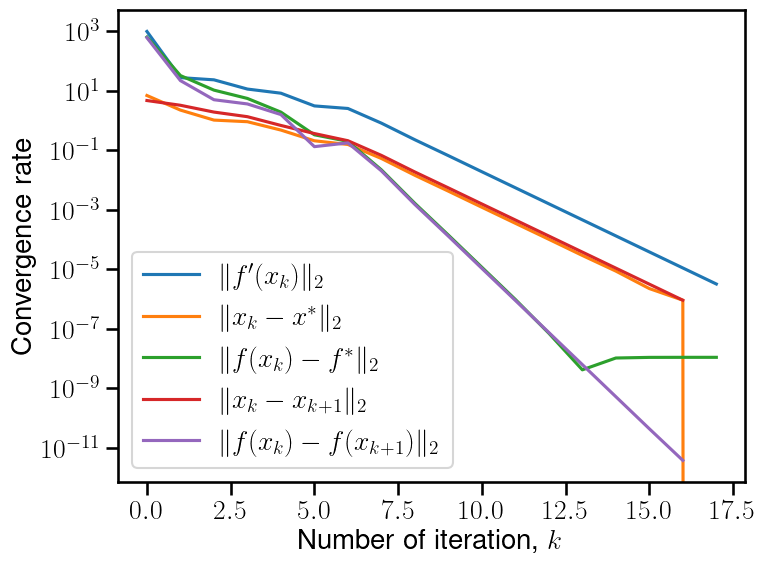

In [13]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x = gd.solve(x0, tol=1e-5, max_iter=100, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.semilogy([np.linalg.norm(np.array(x_conv[i]) - np.array(x_conv[i+1])) for i in range(len(x_conv) - 1)], label=r"$\|x_k - x_{k+1}\|_2$")
plt.semilogy([np.linalg.norm(f(np.array(x_conv[i])) - f(np.array(x_conv[i+1]))) for i in range(len(x_conv) - 1)], label=r"$\|f(x_k) - f(x_{k+1})\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.tight_layout()
plt.show()

### Зависимость скорости сходимости от параметров линейного поиска

Для простоты используем только условие достаточного убывания

#### Зависимость от $\rho$

От величины коэффициента $\rho$ зависит насколько агрессивно будет уменьшаться величина шага в процессе поиска.

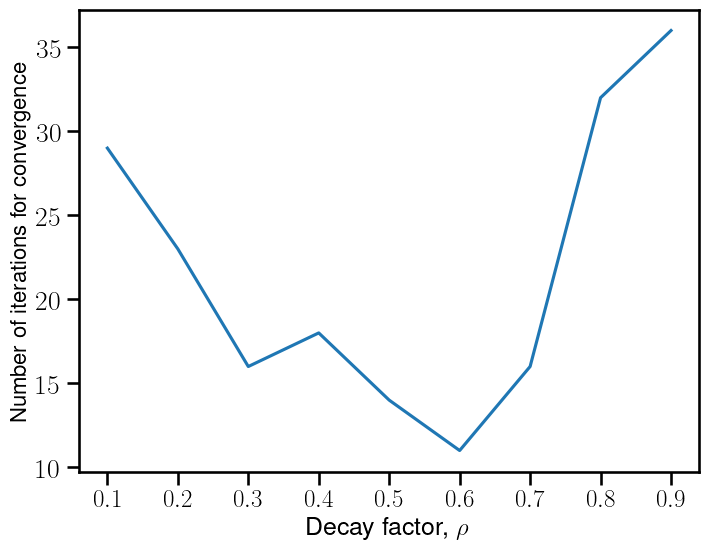

In [14]:
rhos = [0.1 + i * 0.1 for i in range(9)]
conv_iter = []
hist_x = []
callback = lambda x: my_callback(x, hist_x)
for rho in rhos:
    gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=0.1, rho=rho, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    conv_iter.append(len(gd.get_convergence()))
    
#     plt.semilogy(range(1, len(grad_norm) + 1), grad_norm, label=r"$\rho$ = " + str(rho))
    hist_x = []
plt.figure(figsize=(8, 6))
plt.plot(rhos, conv_iter)
plt.xlabel(r"Decay factor, $\rho$", fontsize=18)
plt.ylabel(r"Number of iterations for convergence", fontsize=16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.show()

#### Зависимость от $\beta_1$

От коэффициента $\beta_1$ зависит угол наклона линейной аппроксимации, с которой сравнивается значение в новой точке $x_k - \alpha_k f'(x_k)$.

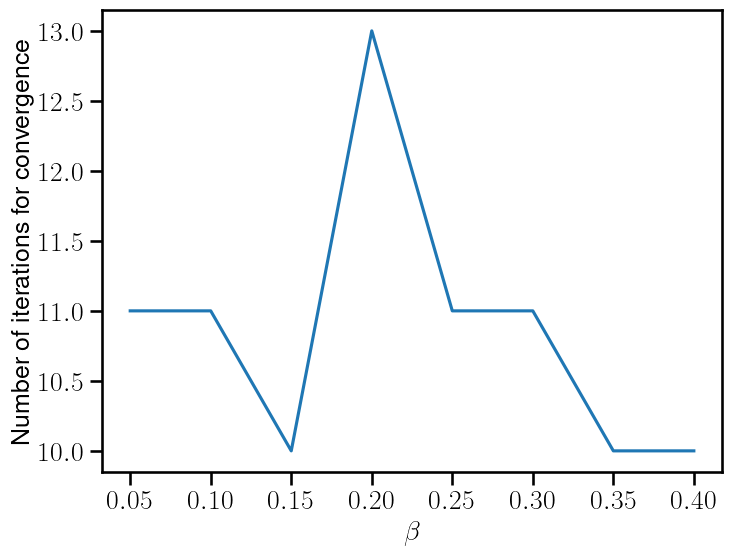

In [15]:
betas = [0.05 + i * 0.05 for i in range(8)]
hist_x = []
num_iter_conv = []
plt.figure(figsize=(8, 6))
for beta in betas:
    gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=beta, rho=0.6, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    num_iter_conv.append(len(gd.get_convergence()))
    hist_x = []
plt.plot(betas, num_iter_conv)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"Number of iterations for convergence", fontsize=18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Особенности градиентных методов

Достоинства
- легко реализовать
- сходимость как минимум к стационарной точке и почти наверно к точке минимума
- параметры при выборе шага влияют на сходимость не столь сильно
- имеет многочисленные вариации

Недостатки
- сходимость не быстрее линейной
- очень сильно зависит от числа обусловленности $f''(x)$, выбор начального приближения может помочь
- не является оптимальным для выпуклых функций с липшицевым градиентом и сильновыпуклых функций (см. [ускорение Нестерова](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/))

## Система линейных уравнений vs. задача безусловной минимизации
Рассмотрим задачу
$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$
где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем
$$
Ax^* = b
$$
Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Как решить систему $Ax = b$?

- Прямые методы основаны на матричных разложениях:
    - Плотная матрица $A$: для размерностей не больше нескольких тысяч
    - Разреженная (sparse) матрица $A$: для размерностей порядка $10^4 - 10^5$
- Итерационные методы: хороши во многих случаях, единственный подход для задач с размерностью $ > 10^6$

## Метод сопряжённых направлений

В градиентном спуске направления убывания - анти-градиенты, но для функций с плохо обусловленным гессианом сходимость **медленная**.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 
$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Пример**: собственные векторы матрицы $A$

**Утверждение.** Для любой $x_0 \in \mathbb{R}^n$ последовательность $\{x_k\}$, генерируемая методом сопряжённых направлений, сходится к решению системы $Ax = b$ максимум за $n$ шагов.

```python
def ConjugateDirections(x0, A, b, p):
    x = x0
    r = A.dot(x) - b
    for i in xrange(len(p)):
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        x = x + alpha * p[i]
        r = A.dot(x) - b
    return x
```

### Геометрическая интерпретация ([лекция Gilbert'a Strang'a](http://math.mit.edu/classes/18.086/2006/am64.pdf))

<center>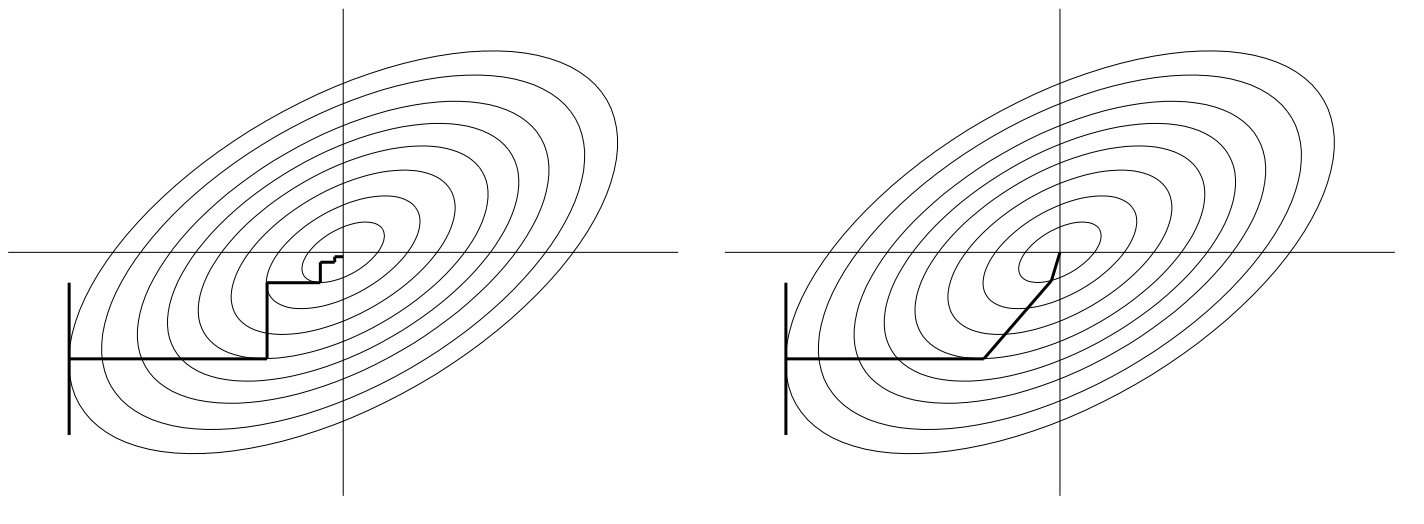</center>

## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:
$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$
Таким образом, для получения следующего сопряжённого направления $p_k$ необходимо хранить только сопряжённое направление $p_{k-1}$ и остаток $r_k$ с предыдущей итерации. 

**Вопрос:** как находить размер шага $\alpha_k$?

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости
$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$
где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - число обусловленности матрицы $A$

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}(A) = \{b, Ab, A^2b, \ldots \}$

### Улучшенная версия метода сопряжённых градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:
$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b):
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) != 0:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического вычисления. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0):
    x = x0
    grad = gradf(x)
    p = -grad
    while np.linalg.norm(gradf(x)) != 0:
        alpha = StepSearch(x, f, gradf, **kwargs)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
        if restart_condition:
            p = -gradf(x)
    return x
```

### Теорема сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда
$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Перезапуск (restart)

1. Для ускорения метода сопряжённых градиентов используют технику перезапусков: удаление ранее накопленной истории и перезапуск метода с текущей точки, как будто это точка $x_0$
2. Существуют разные условия, сигнализирующие о том, что надо делать перезапуск, например
    - $k = n$
    - $\dfrac{|\langle f'(x_k), f'(x_{k-1}) \rangle |}{\| f'(x_k) \|_2^2} \geq \nu \approx 0.1$
3. Можно показать (см. Nocedal, Wright Numerical Optimization, Ch. 5, p. 125), что запуск метода Флетчера-Ривза без использования перезапусков на некоторых итерациях может приводить к крайне медленной сходимости! 
4. Метод Полака-Рибьера и его модификации лишены подобного недостатка.

### Комментарии
- Замечательная методичка "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" размещена [тут](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Помимо метода Флетчера-Ривса существуют другие способы вычисления $\beta_k$: метод Полака-Рибьера, метод Хестенса-Штифеля...
- Для метода сопряжённых градиентов требуется 4 вектора
- Самой дорогой операцией является умножение матрицы на вектор

## Эксперименты


### Квадратичная целевая функция

In [16]:
n = 100
# Random
# A = np.random.randn(n, n)
# A = A.T.dot(A)
# Clustered eigenvalues
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.rand(n)
# Hilbert matrix
# A = np.array([[1.0 / (i+j - 1) for i in range(1, n+1)] for j in range(1, n+1)])
# b = np.ones(n)

f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


#### Распределение собственных значений

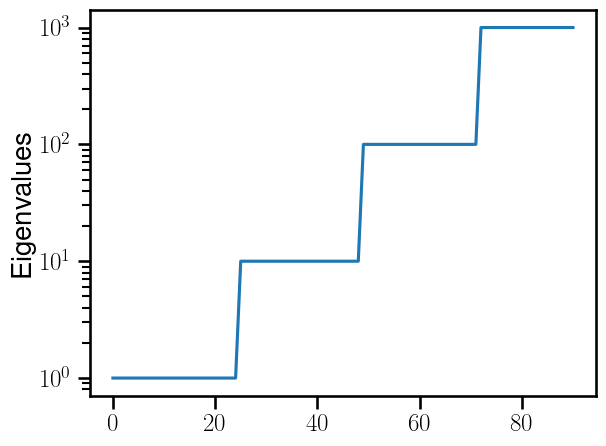

In [17]:
eigs = np.linalg.eigvalsh(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

#### Правильный ответ

In [18]:
def callback(x, array):
    array.append(x)

In [19]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
print("f* =", f(x))

||f'(x*)|| = 4.321202775778769e-08
f* = -14.397550142483812


#### Реализация метода сопряжённых градиентов

In [20]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [21]:
print("\t CG quadratic")
cg_quad = methods.fo.ConjugateGradientQuad(A, b)
x_cg = cg_quad.solve(x0, tol=1e-7, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b))
x_gd = gd.solve(x0, tol=1e-7, disp=True)

print("Condition number of A =", abs(max(eigs)) / abs(min(eigs)))

	 CG quadratic
Required tolerance achieved!
Convergence in 4 iterations
Function value = -14.397550142483993
Norm of gradient = 5.962531064368015
	 Gradient Descent
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -11.250728176564802
Norm of gradient = 9.425119256248134
Condition number of A = 1000.0000000004245


#### График сходимости

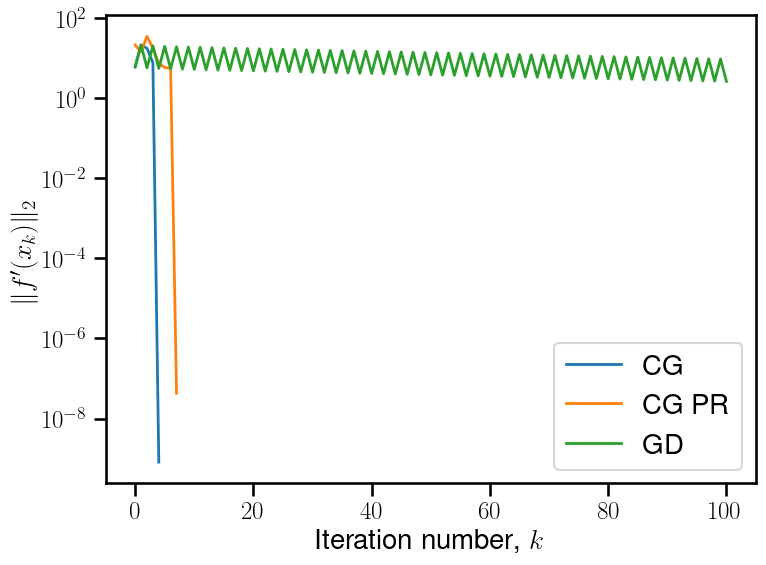

In [22]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()], label=r"CG", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"CG PR", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"GD", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

In [23]:
print([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()])

[5.962531064368015, 21.135813451495824, 17.47208983218993, 7.676646467935155, 8.192044268187237e-10]


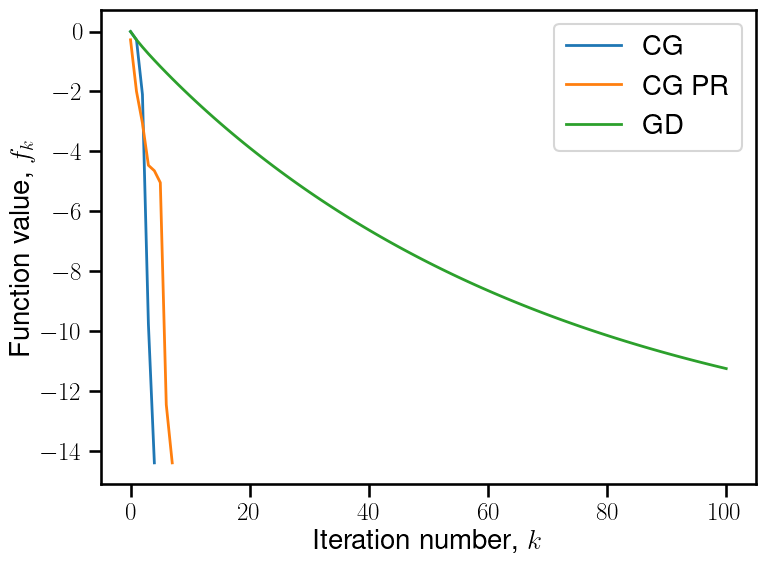

In [24]:
plt.figure(figsize=(8,6))
plt.plot([f(x) for x in cg_quad.get_convergence()], label=r"CG", linewidth=2)
plt.plot([f(x) for x in scopt_cg_array], label=r"CG PR", linewidth=2)
plt.plot([f(x) for x in gd.get_convergence()], label=r"GD", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"Function value, $f_k$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
#plt.savefig("./cg_gd_plot_f.pdf",format="pdf")
plt.show()

### Неквадратичная функция

In [25]:
n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1
def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]
# f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
# grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 1.8904163087134676


#### Реализация метода Флетчера-Ривса

In [26]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = utils.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = gradf(x)
            p = -grad
    return x

#### График сходимости

In [27]:
n_restart = 100
tol = 1e-5
max_iter = 600

scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=grad_f, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x
print("\t CG by Polak-Rebiere")
print("Norm of garient = {}".format(np.linalg.norm(grad_f(x))))
print("Function value = {}".format(f(x)))

print("\t CG by Fletcher-Reeves")
cg_fr = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.5, beta1=0.01, beta2=0.9, init_alpha=1.))
x = cg_fr.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t CG by Fletcher-Reeves with restart n")
cg_fr_rest = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.5, beta1=0.01, beta2=0.9, 
                                         init_alpha=1.), restarts.Restart(n // n_restart))
x = cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Wolfe", rho=0.5, beta1=0.01, beta2=0.9, init_alpha=1.))
x = gd.solve(x0, max_iter=max_iter, tol=tol, disp=True)

	 CG by Polak-Rebiere
Norm of garient = 2.5559916979038834e-05
Function value = 0.4961880187060285
	 CG by Fletcher-Reeves
Required tolerance achieved!
Convergence in 309 iterations
Function value = 0.49618801860355105
Norm of gradient = 9.406109610154882e-06
	 CG by Fletcher-Reeves with restart n
Required tolerance achieved!
Convergence in 58 iterations
Function value = 0.49618801860870265
Norm of gradient = 7.003838682301114e-06
	 Gradient Descent
Required tolerance achieved!
Convergence in 255 iterations
Function value = 0.4961880186245642
Norm of gradient = 9.027703463178476e-06


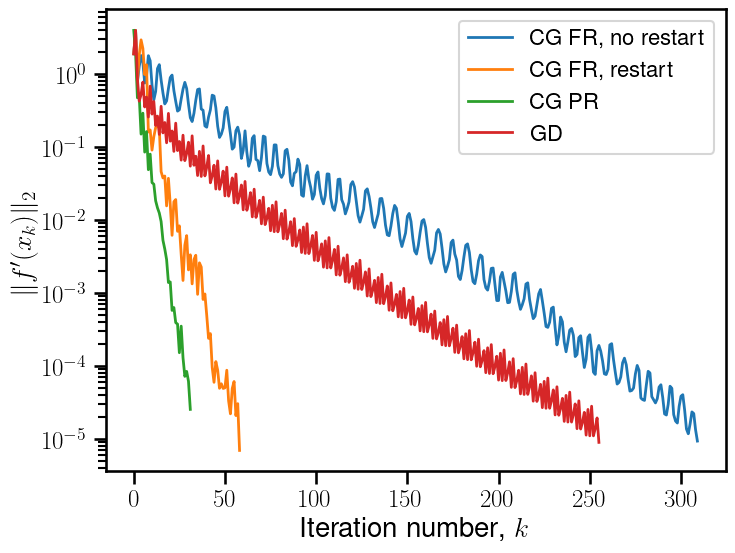

In [28]:
plt.figure(figsize=(8, 6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr.get_convergence()], label=r"CG FR, no restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr_rest.get_convergence()], label=r"CG FR, restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"CG PR", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"GD", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#### Время выполнения

In [29]:
%timeit scopt.minimize(f, x0, method="CG", tol=tol, jac=grad_f, options={"maxiter": max_iter})
%timeit cg_fr.solve(x0, tol=tol, max_iter=max_iter)
%timeit cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter)
%timeit gd.solve(x0, tol=tol, max_iter=max_iter)

11.2 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
329 ms ± 42.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
49.8 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
217 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Метод тяжёлого шарика (Б.Т. Поляк, 1964)

- Для квадратичной целевой функции зигзагообразное поведение градиентного спуска обусловлено неоднородностью направлений
- Учитывать предыдущие направления для поиска новой точки
- Метод тяжёлого шарика
$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

### Визуализация
Картинка [отсюда](https://www.princeton.edu/~yc5/ele538_optimization/lectures/accelerated_gradient.pdf) 
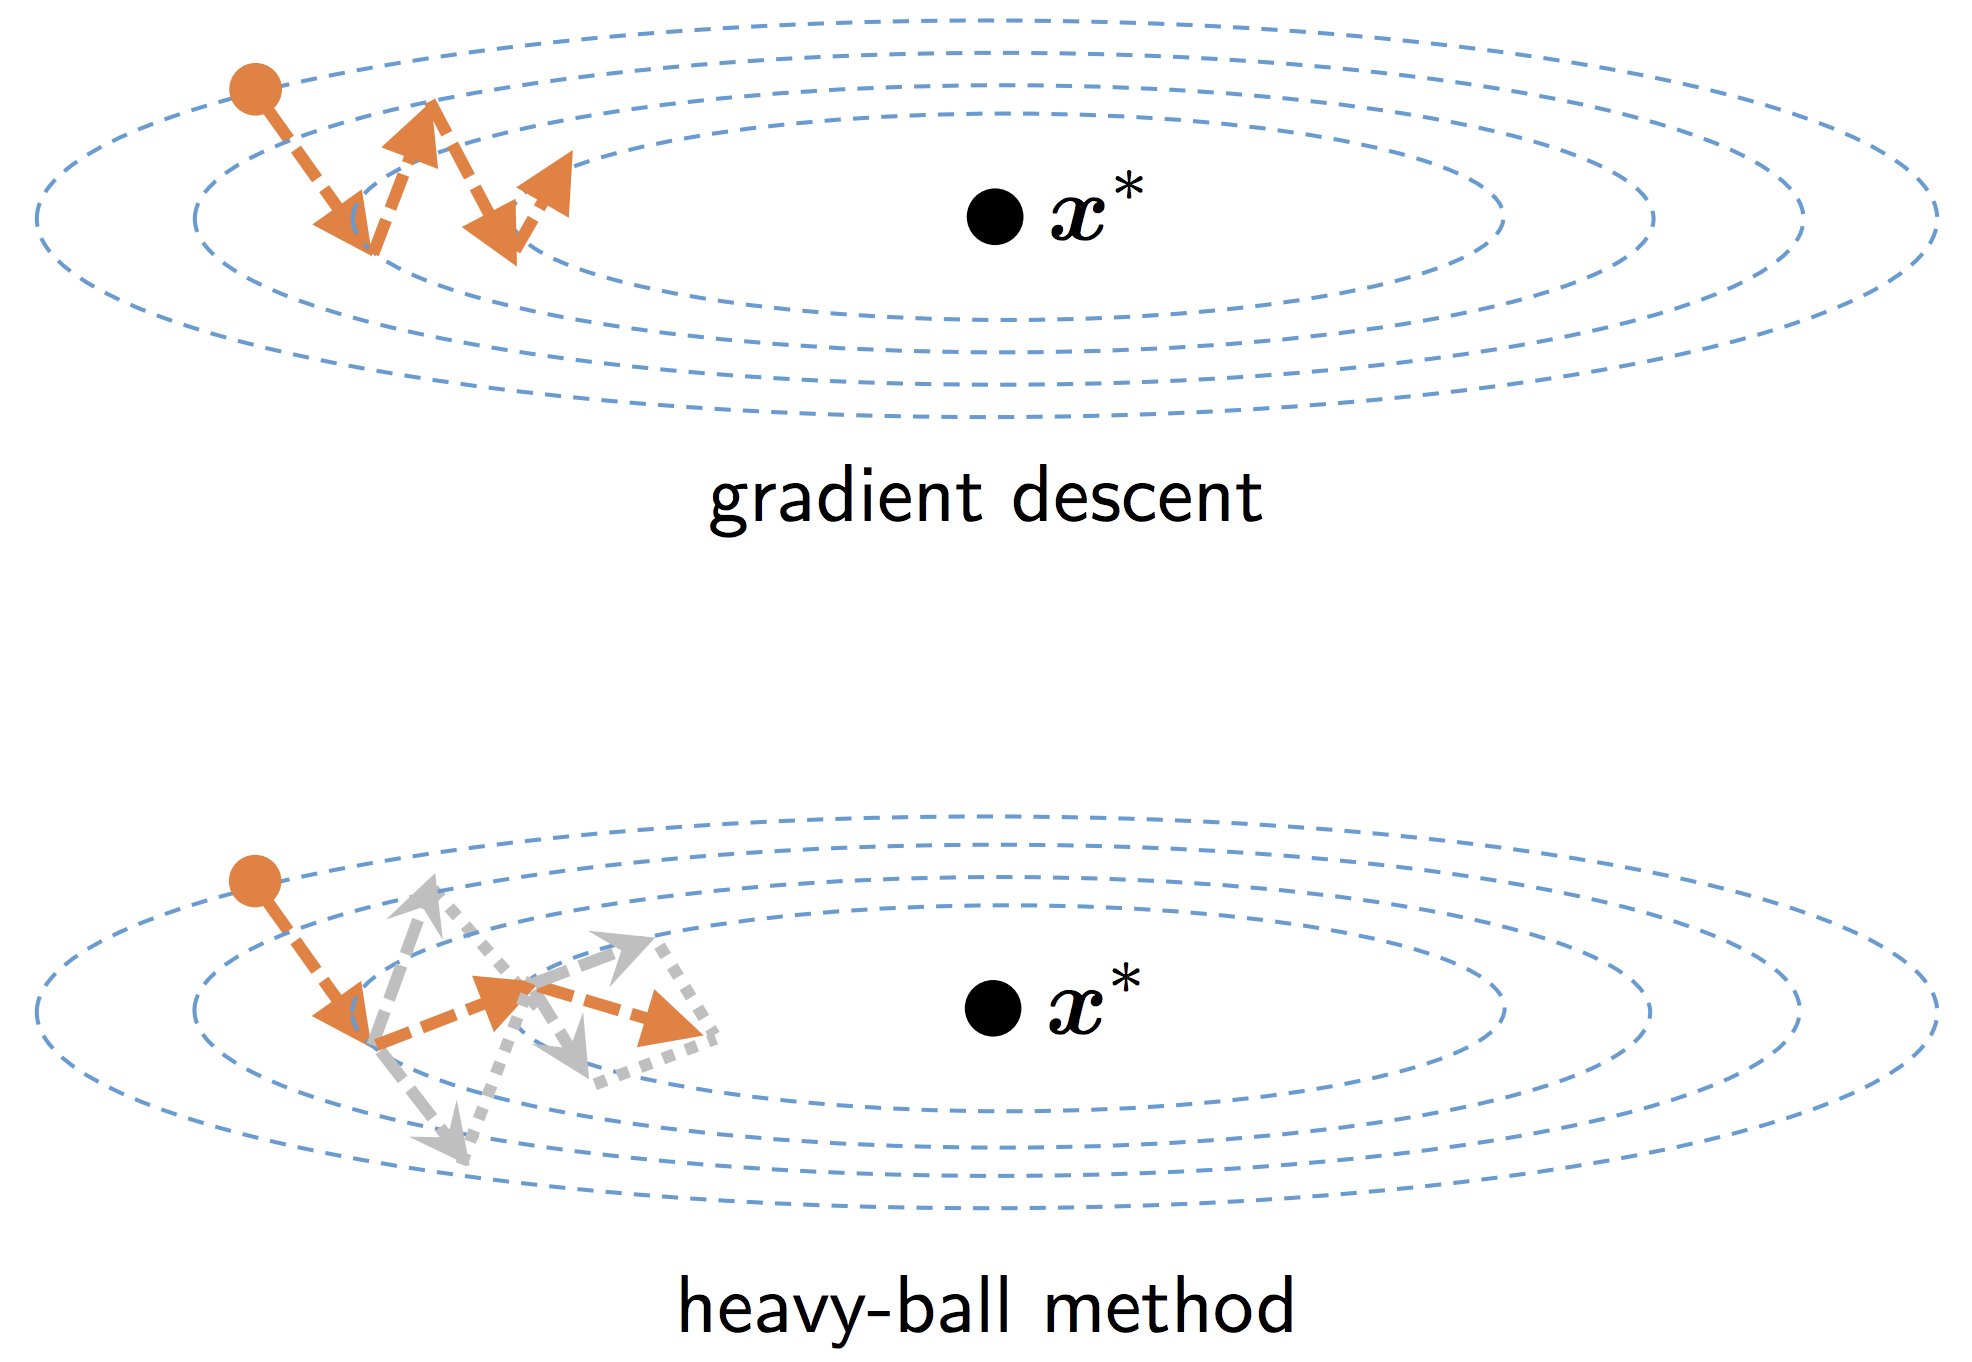

### Сходимость

Пусть $f$ сильно выпукла с Липшицевым градиентом. Тогда для $\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}$ и $\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)$ справедлива следующая оценка сходимости

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$

## Эксперименты

In [30]:
class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

### Тестовая функция

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

In [31]:
n = 50
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)

183.00304169507706 0.011785997628130202
0.021510917459016326 0.9684084261369383


In [32]:
methods_dict = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    "HB": HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=0.9),
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(alpha_opt), beta = beta_opt),
    "CG": fo.ConjugateGradientQuad(A, b)
}
x0 = np.random.randn(n)
max_iter = 10000
tol = 1e-6

In [33]:
for m in methods_dict:
    _ = methods_dict[m].solve(x0=x0, max_iter=max_iter, tol=tol)

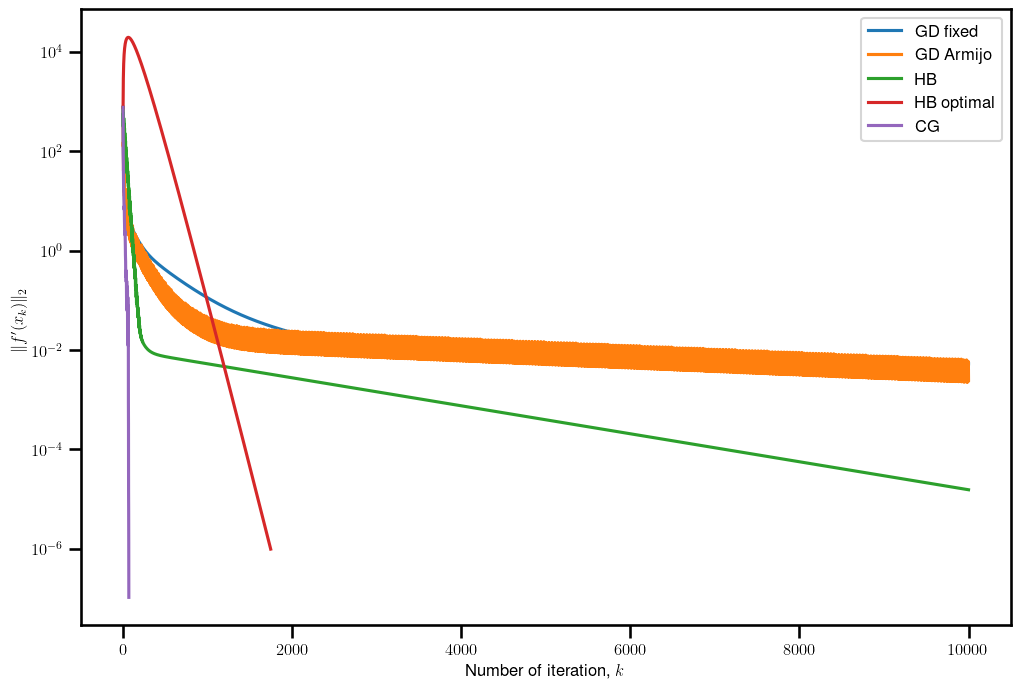

In [34]:
figsize = (12, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods_dict:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods_dict[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

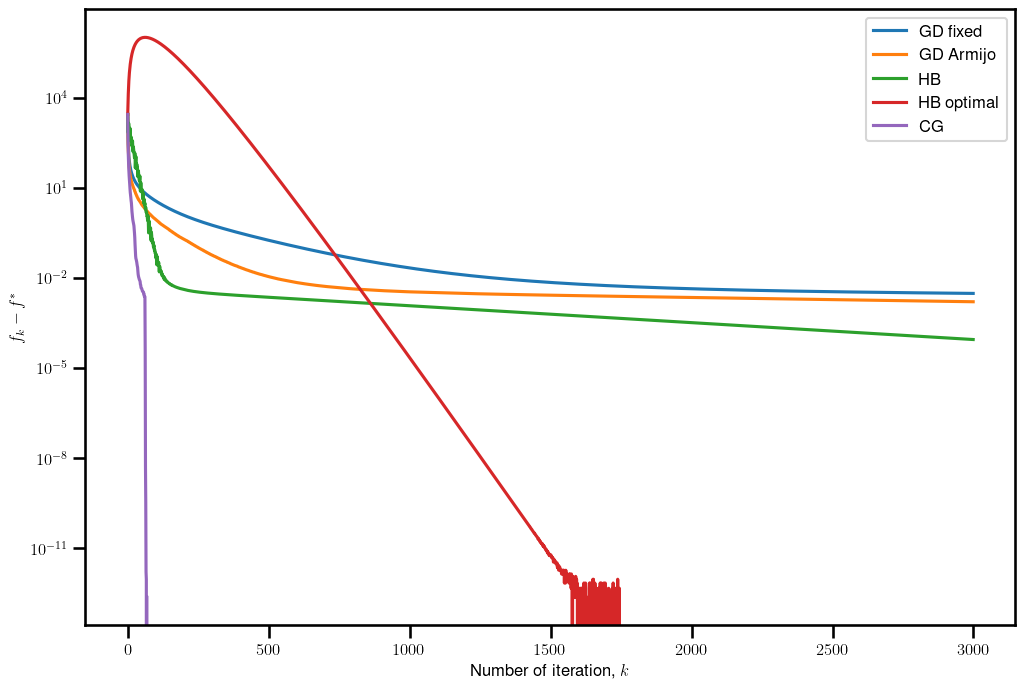

In [35]:
min_f = f(x_true)
figsize = (12, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods_dict:
    plt.plot([f(x) - min_f for x in methods_dict[m].get_convergence()[:3000]], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$f_k -  f^*$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.xscale("log")
plt.yscale("log")
plt.show()

### Главное про метод тяжёлого шарика

- Двухшаговый метод
- Не обязательно монотонный
- Параметры зависят от неизвестных констант
- Решает проблему осцилляций для плохо обусловленных задач
- Сходимость для сильно выпуклых фукнкций сопадает с оптимальным порядком

## Ускоренный метод Нестерова

Одна из возможных форм записи 
\begin{equation*}
\begin{split}
& y_0 = x_0 \\
& x_{k+1} = y_k - \alpha_k f'(y_k)\\
& y_{k+1} = x_{k+1} + \frac{k}{k + 3} (x_{k+1} - x_k)
\end{split}
\end{equation*}

- Сравните с методом тяжёлого шарика
- также не обязательно монотонен
- Для любителей геометрии есть альтернативный метод под названием [geometric descent](https://arxiv.org/pdf/1506.08187.pdf) с такой же скоростью сходимости 

### Визуализация

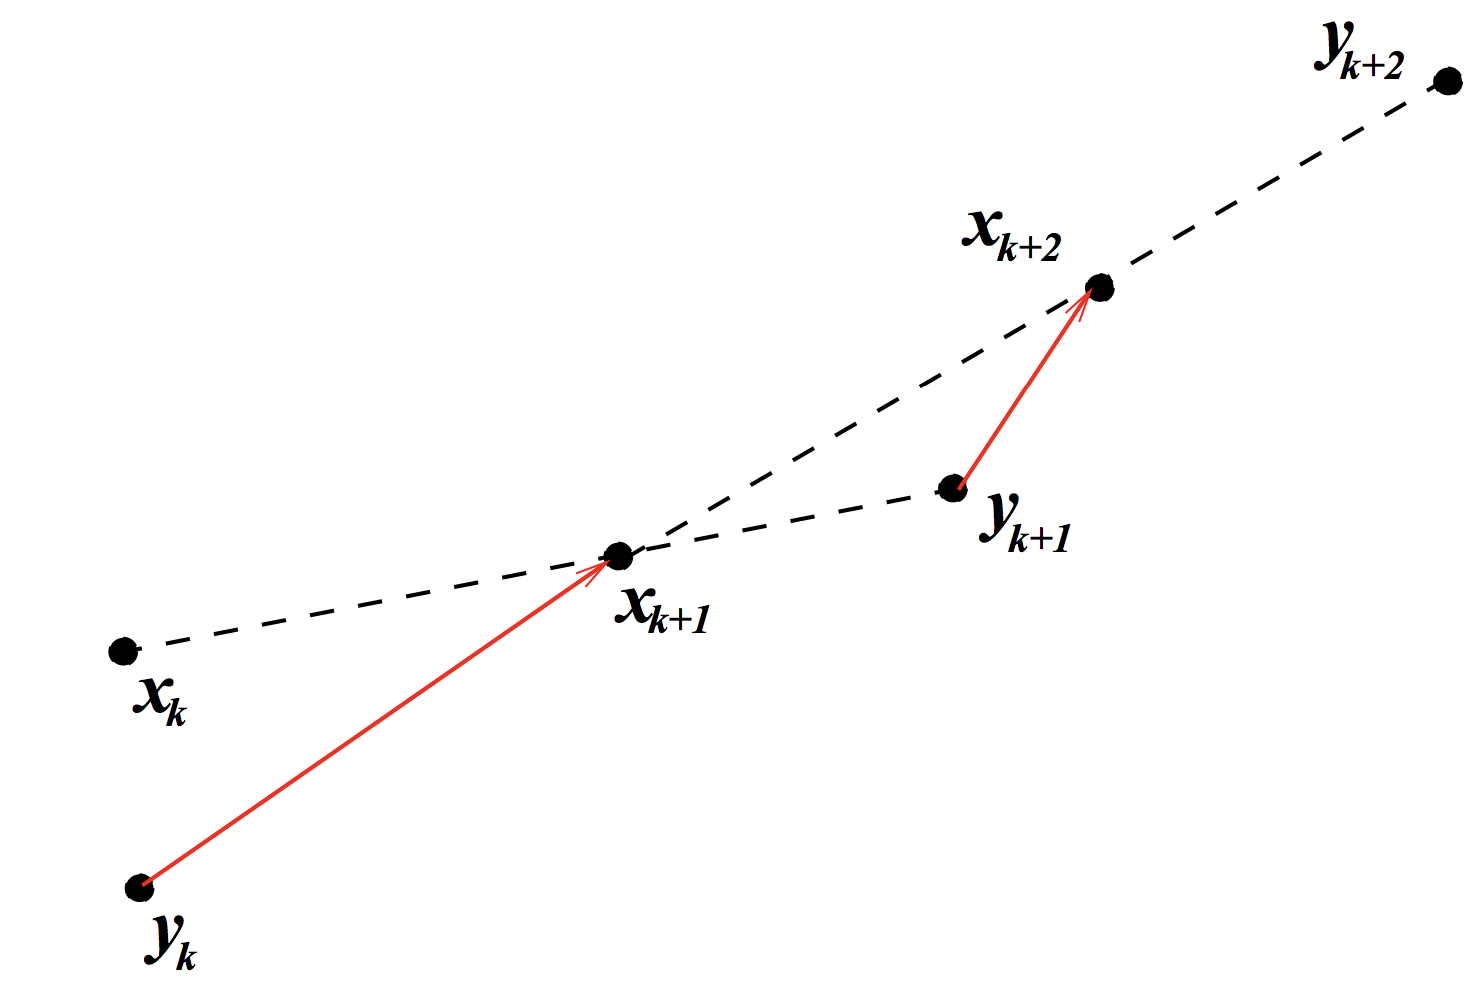

### Сходимость

- Выпуклые функции с Липшицевым градиентом

$$
f(x_k) - f^* \leq \frac{2L \|x_0 - x^*\|_2^2}{(k+1)^2} = \mathcal{O}(1/k^2)
$$

- Сильно выпуклые функции с Липшицевым градиентом

$$
f(x_k) - f^* \leq L \left(1 - \frac{1}{\sqrt{\kappa}} \right)^k \|x_k - x_0\|_2^2
$$

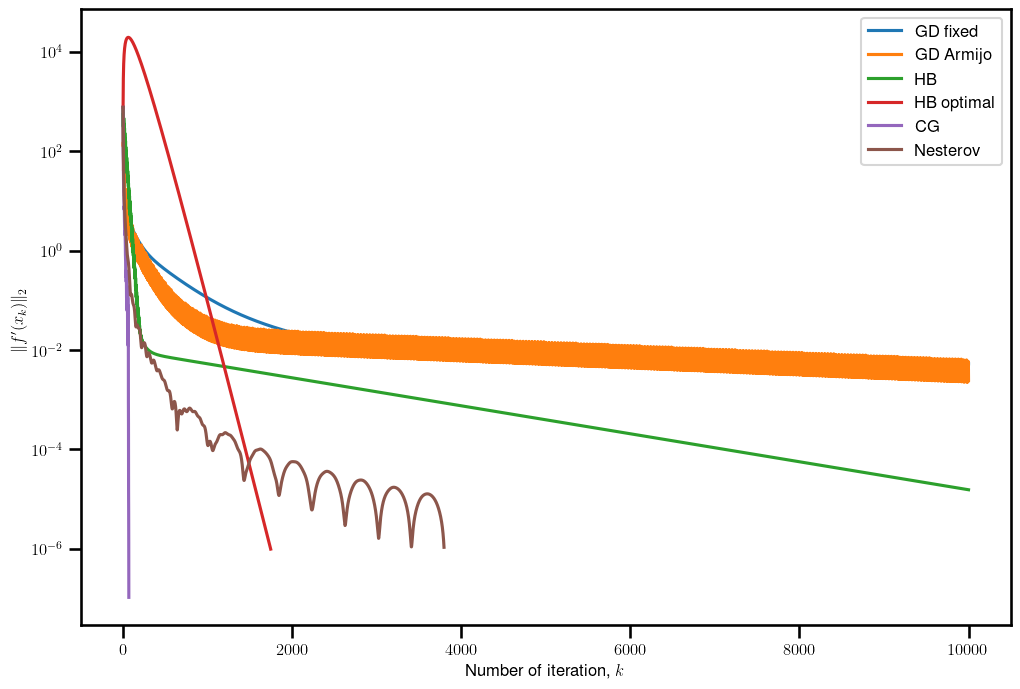

In [36]:
methods_dict["Nesterov"] = fo.AcceleratedGD(f, grad, 
                                       ss.ConstantStepSize(1 / L))
methods_dict["Nesterov"].solve(x0=x0, max_iter=max_iter, tol=tol)
plt.figure(figsize=figsize)
for m in methods_dict:
    plt.semilogy([np.linalg.norm(grad(x)) for x in 
                  methods_dict[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

### Комментарии

- Волнообразное поведение может быть подавлено с помощью рестартов
- Нелинейные композиции градиентов могут дать более быстрые на практике методы

## Метод Ньютона: дорого и быстро

## Недостатки градиентного спуска

- Линейная скорость сходимости
- Зависимость от числа обусловленности гессиана

## Идея метода Ньютона
Рассмотрим задачу

$$
\min\limits_{x\ \in \mathbb{R}^n} f(x).
$$

- Градиентный спуск $\equiv$ **линейная** аппроксимация $f$
- Метод Ньютона $\equiv$ **квадратичная** аппроксимация $f$:

$$
f(x + h) \approx f(x) + \langle f'(x), h \rangle + \frac{1}{2}h^{\top}f''(x)h \to \min_{h}
$$

Из необходимого условия минимума:

$$
f'(x) + f''(x) h = 0, \qquad h^* = -(f''(x))^{-1} f'(x)
$$


### Является ли найденное направление направлением убывания?

Проверим знак скалярного произведения $\langle f'(x), h^* \rangle$.

$$
\langle f'(x), h^* \rangle = -(f')^{\top}(x) (f''(x))^{-1} f'(x) < 0 \Leftarrow f''(x) \succ 0
$$

**Вопрос:** а что если при некотором $k^*$ гессиан станет неопределён?

## Метод Ньютона

- Классический метод Ньютона: $\alpha_k \equiv 1$
- Демпфированный метод Ньютона: $\alpha_k$ выбирается на каждой итерации по заданному правилу

```python
def NewtonMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while True:
        
        h = ComputeNewtonStep(x, f, **kwargs)
        
        if StopCriterion(x, f, h, **kwargs) < epsilon:
            
            break
            
        alpha = SelectStepSize(x, h, f, **kwargs)
            
        x = x + alpha * h
            
    return x

```

## Теорема сходимости (Ю. Е. Нестеров Введение в выпуклую оптимизацию, $\S$ 1.2)

**Теорема.** Пусть функция $f(x)$
- дважды дифференцируема и её гессиан удовлетворяет условию Липшица с константой $M$
- существует точка локального минимума с положительно определённым гессианом

$$
f''(x^*) \succeq l\mathbf{I}, \; l > 0
$$

- начальная точка $x_0$ достаточно близка к точке минимума, в частности

$$
\|x_0 - x^*\|_2 \leq \frac{2l}{3M}
$$

Тогда метод Ньютона сходится **квадратично**:

$$
\|x_{k+1} - x^* \|_2 \leq \dfrac{M\|x_k - x^*\|^2_2}{2 (l - M\|x_k - x^*\|_2)}
$$

### Пример

Применим метод Ньютона для поиска корня следующей функции

$$
\varphi(t) = \dfrac{t}{\sqrt{1+t^2}}
$$

и определим область сходимости.

## Аффинная инвариантность

Рассмотрим функцию $f(x)$ и невырожденное преобразование с матрицей $A$. 

Выясним, как изменится шаг метода Ньютона после преобразования $A$.

Пусть $x = Ay$ и $g(y) = f(Ay)$. Тогда

$$
g(y + u) \approx g(y) + \langle g'(y), u \rangle + \frac{1}{2} u^{\top} g''(y) u \to \min_{u}
$$

и

$$
u^* = -(g''(y))^{-1} g'(y) \qquad y_{k+1} = y_k - (g''(y_k))^{-1} g'(y_k)
$$

или

\begin{align*}
y_{k+1} & = y_k - (A^{\top}f''(Ay_k)A)^{-1} A^{\top}f'(Ay_k)\\
& = y_k - A^{-1}(f''(Ay_k))^{-1}f'(Ay_k)
\end{align*}

Таким образом,

$$
Ay_{k+1} = Ay_k - (f''(Ay_k))^{-1}f'(Ay_k) \quad x_{k+1} = x_k - (f''(x_k))^{-1}f'(x_k)
$$

Следовательно, направление метода Ньютона преобразуется при 

линейном преобразовани так же, как и координаты!

### Метод Ньютона с модификацией гессиана

- Как быть с возможной неположительной определённостью гессиана на некоторой итерации?
- Если $f''(x)$ неположительно определён, использовать положительно определённую матрицу $f''(x) + \Delta E$
- Матрицу $\Delta E$ можно выбирать различными способами исходя из следующей задачи
$$
\Delta E = \arg\min \|\Delta E\|, \quad \text{s.t. } f''(x) + \Delta E \succ 0
$$
    - $\|\cdot\|_2$: $\Delta E = \tau I$, где $\tau = \max(0, \delta - \lambda_{\min}(f''(x)))$, где $\delta > 0$ - заданная оценка снизу минимального собственного значения матрицы $f''(x) + \Delta E$
    - Чему равно $\Delta E$ при использовании $\|\cdot\|_F$?
    
- Поскольку оценку $\lambda(f''(x))$ обычно сложно вычислять на каждой итерации, возможно модифицировать процедуру вычисления разложения Холецкого матрицы $f''(x)$ так чтобы в итоге получилось разложение Холецкого для матрицы $f''(x) + \Delta E$

## Вычислительная сложность и эксперименты

Узкие места метода Ньютона:

- формирование и хранение гессиана
- решение систем линейных уравнений

$$
f''(x_k)h = -f'(x_k)
$$

### Сравнение с градиентным спуском

Вспомним задачу нахождения аналитического центра системы неравенств $Ax \leq 1$ при условии $|x_i| \leq 1$

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum\limits_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

$$
f'(x) - ? \quad f''(x) - ?
$$ 

In [40]:
n = 1000
m = 200
x0 = np.zeros((n,))
np.random.seed(617)
A = np.random.rand(n, m) * 10

#### Точное решение с помощью CVXPy

In [42]:
x = cvx.Variable((n, 1))

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T @ x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True, max_iters=1200)
print("Optimal value =", prob.value)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Oct 19 04:54:15 PM: Your problem has 1000 variables, 0 constraints, and 0 parameters.
(CVXPY) Oct 19 04:54:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 04:54:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 04:54:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 19 04:54:15 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 04:54:15 PM: Compiling problem (target solver=SCS).
(CV

#### Вспомогательные функции

In [43]:
f = lambda x: -np.sum(np.log(np.maximum(1 - A.T.dot(x), EPS))) - np.sum(np.log(np.maximum(1 - x*x, EPS)))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
hess_f = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

#### Реализация метода Ньютона

In [44]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

#### Сравнение с градиентным спуском

In [45]:
newton = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newton = newton.solve(x0, tol=1e-6, max_iter=46, disp=True)

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_gd = gd.solve(x0, tol=1e-6, max_iter=46, disp=True)

Required tolerance achieved!
Convergence in 14 iterations
Function value = -1368.8859481345407
Norm of gradient = 7.818220730966594e-10
Maximum iteration exceeds!
Convergence in 46 iterations
Function value = -1368.885948134541
Norm of gradient = 1.2867553267862597e-06


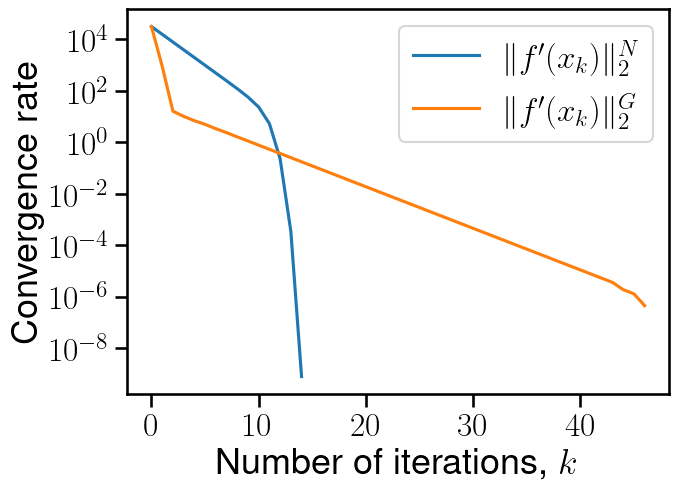

In [46]:
plt.figure(figsize=(7, 5))
# Newton
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton.get_convergence()], label="$\| f'(x_k) \|^{N}_2$")
# Gradient
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label="$\| f'(x_k) \|^{G}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)
plt.show()

#### Сравнение времени работы

In [47]:
%timeit newton.solve(x0, tol=1e-6, max_iter=46)
%timeit gd.solve(x0, tol=1e-6, max_iter=46)

333 ms ± 58.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
215 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- Метод Ньютона даёт очень точное решение за длительное время
- Градиентный спуска даёт не очень точное решение, но гораздо быстрее
- Часто бывает, что очень точное решение не требуется, поэтому градиентный спуск может быть предпочтительнее

### Особенности метода Ньютона

Достоинства

- квадратичная сходимость вблизи решения
- высокая точность полученного решения
- аффинная инвариантность
- параметры слабо влияют на скорость сходимости

Недостатки

- необходимо хранить гессиан на каждой итерации: $O(n^2)$ памяти
- необходимо решать линейные системы: $O(n^3)$ операций
- гессиан может оказаться вырожден
- гессиан может не быть положительно определён $\to$ направление $-(f''(x))^{-1}f'(x)$ может не быть направлением убывания

## Сравнение с градиентным методом (Б.Т. Поляк Введение в оптимизацию, гл. 3, $\S$ 1 )

Метод | Скорость сходимости | Сложность | Аффинная инвариантность | Требования к $f(x)$
:---: | :---: | :---: | :---: | :---
Градиентный спуск | Глобально линейная | $O(n) + $ определение шага | Нет | Дифференцируема; градиент липшицев
Метод Ньютона | Локально квадратичная | $O(n^3) + $ определение шага | Да | Дважды диференцируема; гессиан липшицев, положительно определён


## Что дальше?

- **Сложность:** как избавиться от решения систем линейных уравнений и хранения гессиана?
- **Сходимость:** как совместить локально квадратичную и глобально линейную скорости? Желательно получить глобально квадратичную сходимость!
- Требования к $f(x)$ необходимо минимизировать
- Квазиньютоновские методы частично решают эти проблемы

## Квазиньютоновские методы: между двух огней

## Сравнительный анализ метода Ньютона и градиентного спуска

Метод | Скорость сходимости | Сложность | Аффинная инвариантность | Требования к $f(x)$
:---: | :---: | :---: | :---: | :---:
Градиентный спуск | Глобально линейная | $O(n) + $ определение шага | Нет | Дифференцируема; градиент липшицев
Метод Ньютона | Локально квадратичная | $O(n^3) + $ определение шага | Да | Дважды диференцируема; гессиан липшицев, положительно определён

## Как уменьшить сложность хранения и вычисления?

- Сложность вычисления можно уменьшить с помощью
    - Квазиньютоновские методы, они же методы переменной метрики
    - Требуется хранение матрицы $n \times n$
    
- Сложность вычисления и хранения можно уменьшить 
    - квазиньютоновские методы с ограниченной памятью, например [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) (Limited Memory Broyden-Fletcher-Goldfarb-Shanno)
    - НЕ требуется хранить матрицу
    - вместо этого хранятся $k \ll n$ векторов из $\mathbb{R}^n$

## Единообразный способ получения метода Ньютона и градиентного спуска 

- градиентный метод получен из аппроксимации первого порядка:

$$
f_G(x) \approx f(y) + \langle f'(y), x - y \rangle + \frac{1}{2}(x-y)^{\top} \frac{1}{\alpha}I(x - y)
$$

причём при $\alpha \in (0, 1/L], f(x) \leq f_G(x)$, то есть $f_G$ - глобальная оценка $f(x)$
- метод Ньютона получен из аппроксимации второго порядка

$$
f_N(x) \approx f(y) + \langle f'(y), x - y \rangle + \frac{1}{2} (x-y)^{\top}f''(y)(x-y)
$$

**Идея:** использовать промежуточную аппроксимацию вида

$$
f_q(x) \approx f(y) + \langle f'(y), x - y \rangle + \frac{1}{2} (x-y)^{\top}{\color{red}{B(y)}}(x-y),
$$

которая даёт переход к следующей точке:

$$
x_{k+1} = x_k - \alpha_k B^{-1}_k f'(x_k) = x_k - \alpha_k H_k f'(x_k)
$$

## Немного истории...
- Первый квазиньютоновский метод придумал физик William Davidon в середине 1950-х для ускорения своих вычислений на ненадёжных компьютерах
- Его статью с описанием предложенного метода не приняли к публикации, и она оставалась техническим отчётом <br></br> более 30 лет
- [Опубликована](http://epubs.siam.org/doi/abs/10.1137/0801001) в 1991 году в первом выпуске [SIAM Journal on Optimization](https://www.siam.org/journals/siopt.php) 

## Общая схема квазиньютоновских методов

```python
def QuasiNewtonMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    H = I
    
    while True:
        
        h = -H.dot(grad_f(x))
        
        if StopCriterion(x, f, h, **kwargs) < epsilon:
            
            break
            
        alpha = SelectStepSize(x, h, f, **kwargs)
            
        x = x + alpha * h
            
        H = UpdateH(H, f(x), grad_f(x))
            
    return x
```

## Как искать $B_{k+1}$?

В точке $x_{k+1}$ имеем следующую аппрокисмацию:

$$
f_q(h) \approx f(x_{k+1}) + \langle f'(x_{k+1}), h \rangle + \frac{1}{2}h^{\top}B_{k+1}h
$$

Из определения, очевидно, что $B_{k+1} \in \mathbb{S}^n_{++}$.
Какие требования естественно наложить на $f_q(h)$?

$$
f_q'(-\alpha_k h_k) = f'(x_k) \qquad f'_q(0) = f'(x_{k+1}),
$$

где первое условие даёт

$$
f'(x_{k+1}) - \alpha_k B_{k+1}h_k = f'(x_k),
$$

а второе выполняется автоматически.

### Квазиньютоновское уравнение (Secant equation)

Из первого условия получаем

$$
B_{k+1}s_k = y_k,
$$

где $s_k = x_{k+1} - x_k$ и $y_k = f'(x_{k+1}) - f'(x_k)$.

Это уравнение будет иметь решение только при $s^{\top}_k y_k > 0$.

### Как однозначно определить $B_{k+1}$?

\begin{align*}
& \min_B \| B_k - B \| \\
\text{s.t. } & B = B^{\top}\\
& Bs_k = y_k
\end{align*}

## DFP (Davidon-Fletcher-Powell)

$$
B_{k+1} = (I - \rho_k y_k s^{\top}_k)B_k(I - \rho_k s_ky^{\top}_k) + \rho_k y_k y^{\top}_k,
$$

где $\rho_k = \dfrac{1}{y^{\top}_k s_k}$,

или с помощью формулы Шермана-Морисона-Вудбери

$$
B^{-1}_{k+1} = H_{k+1} = H_k - \dfrac{H_ky_k y_k^{\top}H_k}{y^{\top}_kH_ky_k} + \dfrac{s_ks^{\top}_k}{y^{\top}_ks_k}
$$

### Вывод

Общая идея квазиньютоновских методов: 

вместо полного пересчёта гессиана на каждой итерации обновлять 

текущую его аппроксимацию с помощью легко вычислимого 

преобразования

## BFGS

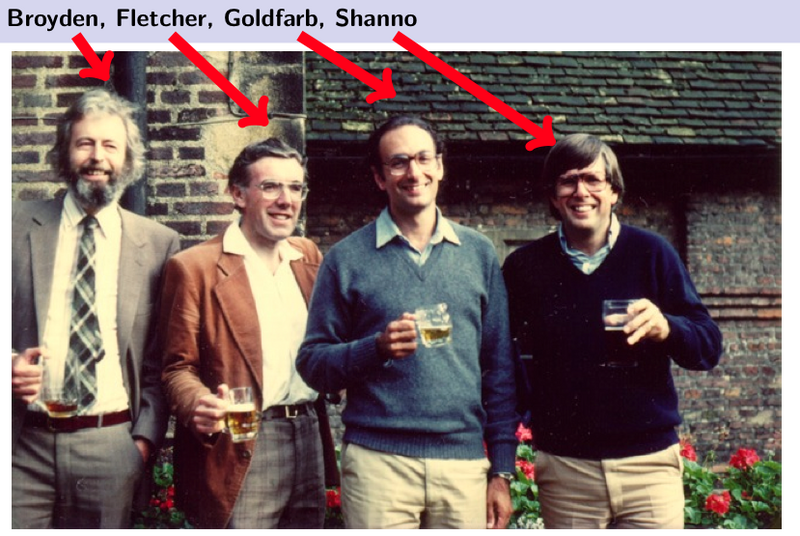

**Вопрос:** какая естественная модификация метода DFP?

\begin{align*}
& \min_H \| H_k - H \| \\
\text{s.t. } & H = H^{\top}\\
& Hy_k = s_k
\end{align*}

Формула пересчёта для метода BFGS:

$$
H_{k+1} = (I - \rho_k s_ky^{\top}_k)H_k(I - \rho_k y_k s^{\top}_k) + \rho_k s_k s^{\top}_k,
$$

где $\rho_k = \dfrac{1}{y^{\top}_k s_k}$

### Детали реализации

- Не должно быть операций сложностью $O(n^3)$, то есть никаких матричных умножений и решений линейных систем (cf. [реализацию в SciPy](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976))
- Только правило Вольфа гарантирует соблюдения условия кривизны $y_k^{\top}s_k > 0$
- Параметры в правиле Вольфа обычно следующие
    - $\alpha_0 = 1$ необходим для сверхлинейной скорости
    - $\beta_1 = 10^{-4}$, $\beta_2 = 0.9$
- Способы инициализации $H_0$
    - единичная матрица
    - $H_0 = \frac{y_0^{\top}s_0}{y_0^{\top}y_0}I$ **после** первого шага, но до вычисления $H_1$.При вычислении $x_1$  используется $H_0 = I$
    - $H_0 = \delta \|g_0\|^{-1}_2 I$, параметр $\delta$ необходимо заранее задать
- При использовании $B$ вместо $H$ нужно хранить $B$ в виде $LDL^{\top}$ разложения и обновлять не саму матрицу $B$, а её разложение. Это явно делается за $O(n^2)$. Вычисление $h_k$ - это решение линейной системы с предвычисленным раздложением матрицы, следовательно сложность также $O(n^2)$. Этот подход позволяет контролировать устройчивость в диагонали матрицы $D$. На практике предпочтительнее работать с матрицей $H$


### Сходимость

**Теорема**

Пусть $f$ дважды непрерывно дифференцируема и её гессиан липшицев, также пусть последовательность генерируемая методом BFGS сходится к точке $x^*$ так что $\sum_{k=1}^{\infty} \|x_k - x^*\| < \infty$. Тогда $x_k \to x^*$ сверхлинейно.

**Цикл работ по квазиньютоновским метдом с анализом явно выраженной неасимптотической скоростью сходимости**

[Greedy Quasi-Newton Methods with Explicit Superlinear Convergence](https://arxiv.org/abs/2002.00657)

[New Results on Superlinear Convergence of Classical Quasi-Newton Methods](https://link.springer.com/article/10.1007/s10957-020-01805-8)

[Rates of superlinear convergence for classical quasi-Newton methods](https://link.springer.com/article/10.1007/s10107-021-01622-5)

### Самокоррекция

- Если BFGS на некоторой итерации даёт плохую оценку обратного гессиана, то через несколько итераций это недоразумение будет **автоматически** исправлено, то есть метод сам скорректирует грубую оценку гессиана
- Это свойство появляется только при правильном способе выбора шага, например при использовании правила Вольфа
- Метод DFP существенно хуже корректирует неточные оценки обратного гессиана
- Всё это будет ниже проиллюстрировано на примерах

## BFGS с ограниченной памятью (L-BFGS)

- В методе BFGS нужна не сама матрица $H$, а только функция умножения её на вектор 
- Поскольку требуется локальная оценка гессиана, старые значения векторов $s$ и $y$ могут портить текущую оценку

**Идея**

- Хранить $k \ll n$ последних векторов $s$ и $y$ - снижение требуемой памяти с $n^2$ до $kn$
- Выполнение умножения на вектор рекурсивно, без явного формирования матрицы $H$

### Сравнение с нелинейным методом сопряжённых градиентов

- В методе Хестенса-Штифеля

$$
h_{k+1} = -f'(x_{k+1}) + \beta_{k+1} h_{k}, \quad \beta_{k+1} = \frac{y_k^{\top}f'(x_{k+1})}{y_k^{\top} h_k}
$$

или

$$
h_{k+1} = -\left(I - \frac{s_k y_k^{\top}}{y_k^{\top}s_k}\right)f'(x_{k+1}) = -\hat{H}_{k+1} f'(x_{k+1})
$$

- Матрица $\hat{H}_{k+1}$ несимметрична и неположительно определённая, однако матрица 

$$
H_{k+1} = \left(I - \frac{s_k y_k^{\top}}{y_k^{\top}s_k}\right)\left(I - \frac{y_k s_k^{\top}}{y_k^{\top}s_k}\right) + \frac{s_ks_k^{\top}}{y_k^{\top}s_k}
$$

удовлетворяет всем требованиям к матрице в методе BFGS и совпадает с формулой для обновления $H_k$, если $H_k = I$, то есть $k=1$ в методе LBFGS и $H_0 = I$
- Более того, при выборе шага по правилу наискорейшего спуска, формулы для метода Хестенса Штифеля и LBFGS с $k = 1$ в точности совпадают

## Barzilai-Borwein method

- Первая [статья](http://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf) об этом методе опубликована в 1988, в журнале IMA Journal of Numerical Analysis
- [Статья](http://papers.nips.cc/paper/6286-barzilai-borwein-step-size-for-stochastic-gradient-descent.pdf) на NIPS 2016 о модификации этого метода в случае использования стохастической оценки градиента
- Идея: комбинация идеи наискорейшего спуска и квазиньютоновского метода

### Идея метода

- Наискорейший спуск: $x_{k+1} = x_k - \alpha_k f'(x_k)$, $\alpha_k = \arg \min\limits_{\alpha > 0} f(x_{k+1})$
- Метод Ньютона: $x_{k+1} = x_k - (f''(x_k))^{-1} f'(x_k)$
- Аппроксимация гессиана диагональной матрицей:

$$
\alpha_k f'(x_k) = \alpha_k I f'(x_k) = \left( \frac{1}{\alpha_k} I \right)^{-1} f'(x_k) \approx (f''(x_k))^{-1} f'(x_k)
$$

- Как найти $\alpha_k$?

### Снова квазиньютоновское уравнение (Secant equation)
- Для точного гессиана
$$
f''(x_{k})(x_{k} - x_{k-1}) = f'(x_{k}) - f'(x_{k-1})
$$
- Для приближения

$$
\alpha_k^{-1} s_{k-1} \approx y_{k-1}
$$

- Задача аппроксимации одного вектора с помощью масштабирования другого
- Простейший квазиньютоновский метод вырождается в поиск оптимального шага

### Три способа найти $\alpha_k$

- Первый способ
    - Задача
    
    $$
    \min_{\beta} \|\beta s_{k-1} - y_{k-1} \|^2_2
    $$
    
    - Решение
    
    $$
    \alpha = \frac{1}{\beta} = \frac{s^{\top}_{k-1} s_{k-1}}{s^{\top}_{k-1} y_{k-1}}
    $$
    
- Второй способ
    - Задача
    
    $$
    \min_{\alpha} \| s_{k-1} - \alpha y_{k-1} \|^2_2
    $$
    
    - Решение
    
    $$
    \alpha = \frac{s^{\top}_{k-1} y_{k-1}}{y^{\top}_{k-1} y_{k-1}}
    $$
- Третий способ называется немонотонный линейный поиск: специальная модификация правил Армихо, учитывающая историю изменений значения функции, [статья](https://www.math.lsu.edu/~hozhang/papers/nonmonotone.pdf) 2004 г. в SIAM Journal on Optimization

## Эксперименты

### Поиск аналитического центра системы неравенств

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum\limits_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

In [48]:
n = 3000
m = 100
x0 = np.zeros(n)
max_iter = 100
tol = 1e-5
A = np.random.rand(m, n) * 10

In [49]:
f = lambda x: -np.sum(np.log(np.maximum(1 - A.dot(x), EPS))) - np.sum(np.log(np.maximum(1 - x*x, EPS)))
grad_f = lambda x: np.sum(A.T / (1 - A.dot(x)), axis=1) + 2 * x / (1 - np.power(x, 2))

In [50]:
def bb_method(f, gradf, x0, tol=1e-6, maxiter=100, callback=None, alpha_type=1):
    it = 0
    x_prev = x0.copy()
    current_tol = np.linalg.norm(gradf(x_prev))
    alpha = 1e-4
    while current_tol > tol and it < maxiter:
        it += 1
        current_grad = gradf(x_prev)
        if it != 1:
            g = current_grad - prev_grad
            if alpha_type == 1:
                alpha = g.dot(s) / g.dot(g)
            elif alpha_type == 2:
                alpha = s.dot(s) / g.dot(s)
        if callback:
            callback(x_prev)
        x_next = x_prev - alpha * current_grad
        current_tol = np.linalg.norm(gradf(x_next))
        prev_grad = current_grad
        s = x_next - x_prev
        x_prev = x_next
    if callback:
        callback(x_prev)
    return x_next

In [51]:
method = {
    "BB 1": methods.fo.BarzilaiBorweinMethod(f, grad_f, init_alpha=1e-4, type=1),
    "BFGS": methods.fo.BFGS(f, grad_f),
    "DFP": methods.fo.DFP(f, grad_f),
    "LBFGS": methods.fo.LBFGS(f, grad_f),
}

In [52]:
for m in method:
    print("\t Method {}".format(m))
    _ = method[m].solve(x0=x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Method BFGS Scipy")
scopt_conv = []
scopt_res = scopt.minimize(f, x0, method="BFGS", jac=grad_f, callback=lambda x: scopt_conv.append(x), 
                           tol=tol, options={"maxiter": max_iter})
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

	 Method BB 1
Required tolerance achieved!
Convergence in 10 iterations
Function value = -706.7352604217099
Norm of gradient = 5.251477631500234e-06
	 Method BFGS
Required tolerance achieved!
Convergence in 24 iterations
Function value = -706.7352604217033
Norm of gradient = 6.487274145978119e-06
	 Method DFP
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -706.7349445866123
Norm of gradient = 0.042443945013196684
	 Method LBFGS
Required tolerance achieved!
Convergence in 14 iterations
Function value = -706.735260421711
Norm of gradient = 3.2128415638636383e-06
	 Method BFGS Scipy
Result: Optimization terminated successfully.
Convergence in 16 iterations
Function value = -706.7352604215141


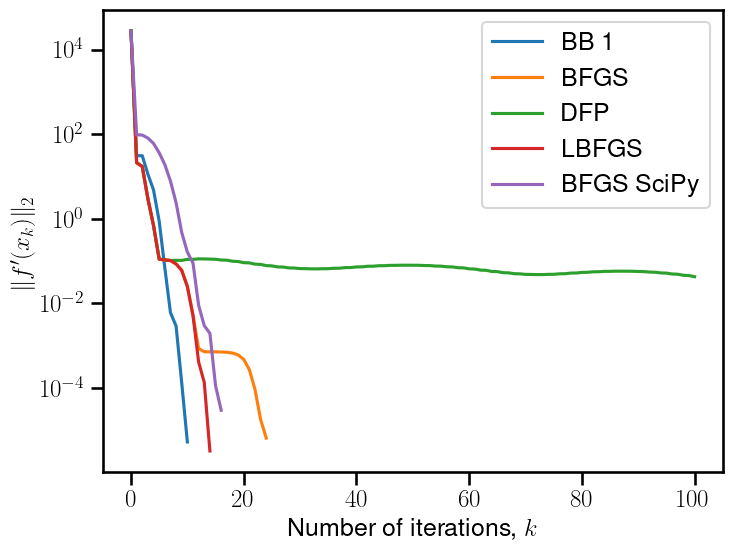

In [53]:
plt.figure(figsize=(8, 6))

for m in method:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in method[m].get_convergence()], label=m)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in [x0] + scopt_conv], label="BFGS SciPy")
plt.ylabel("$\|f'(x_k)\|_2$", fontsize=18)
plt.xlabel("Number of iterations, $k$", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.show()

In [54]:
for m in method:
    print("\t Method {}".format(m))
    %timeit method[m].solve(x0=x0, tol=tol, max_iter=max_iter)

%timeit scopt.minimize(f, x0, method="BFGS", jac=grad_f, tol=tol, options={"maxiter": max_iter})

	 Method BB 1
4.61 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
	 Method BFGS
1.92 s ± 56.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 Method DFP
5.49 s ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 Method LBFGS
51.7 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Плохо обусловленная задача 

In [55]:
n = 50
D = np.arange(1, n+1)
U = np.random.randn(n, n)
U, _ = np.linalg.qr(U)
A = U.dot(np.diag(D)).dot(U.T)
b = np.random.randn(n)
eig_vals = np.linalg.eigvals(A)
print("Condition number = {}".format(np.max(eig_vals) / np.min(eig_vals)))

Condition number = 50.00000000000001


In [56]:
f = lambda x: 0.5 * x.T.dot(A.dot(x)) - b.dot(x)
gradf = lambda x: A.dot(x) - b
x0 = np.random.randn(n)

In [57]:
method = {
    "BB 1": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=1),
    "BB 2": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=2),
    "BFGS": methods.fo.BFGS(f, gradf),
    "DFP": methods.fo.DFP(f, gradf),
    "GD": methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A, b)),
    "LBFGS": methods.fo.LBFGS(f, gradf, hist_size=10),
}

In [58]:
for m in method:
    print("\t Method {}".format(m))
    _ = method[m].solve(x0=x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Method BFGS Scipy")

scopt_conv = []
scopt_res = scopt.minimize(f, x0, method="BFGS", jac=gradf, callback=lambda x: scopt_conv.append(x), 
                           tol=tol, options={"maxiter": max_iter})
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

	 Method BB 1
Required tolerance achieved!
Convergence in 57 iterations
Function value = -1.4796574251036532
Norm of gradient = 9.815973016309294e-06
	 Method BB 2
Required tolerance achieved!
Convergence in 61 iterations
Function value = -1.479657425125067
Norm of gradient = 8.499241497614176e-06
	 Method BFGS
Required tolerance achieved!
Convergence in 46 iterations
Function value = -1.4796574251256664
Norm of gradient = 7.1704705940807596e-06
	 Method DFP
Required tolerance achieved!
Convergence in 94 iterations
Function value = -1.4796574251224353
Norm of gradient = 9.177153402876148e-06
	 Method GD
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -1.4795640523196534
Norm of gradient = 0.01892637059581513
	 Method LBFGS
Required tolerance achieved!
Convergence in 44 iterations
Function value = -1.4796574251209769
Norm of gradient = 7.632359931159327e-06
	 Method BFGS Scipy
Result: Optimization terminated successfully.
Convergence in 60 iterations
Function v

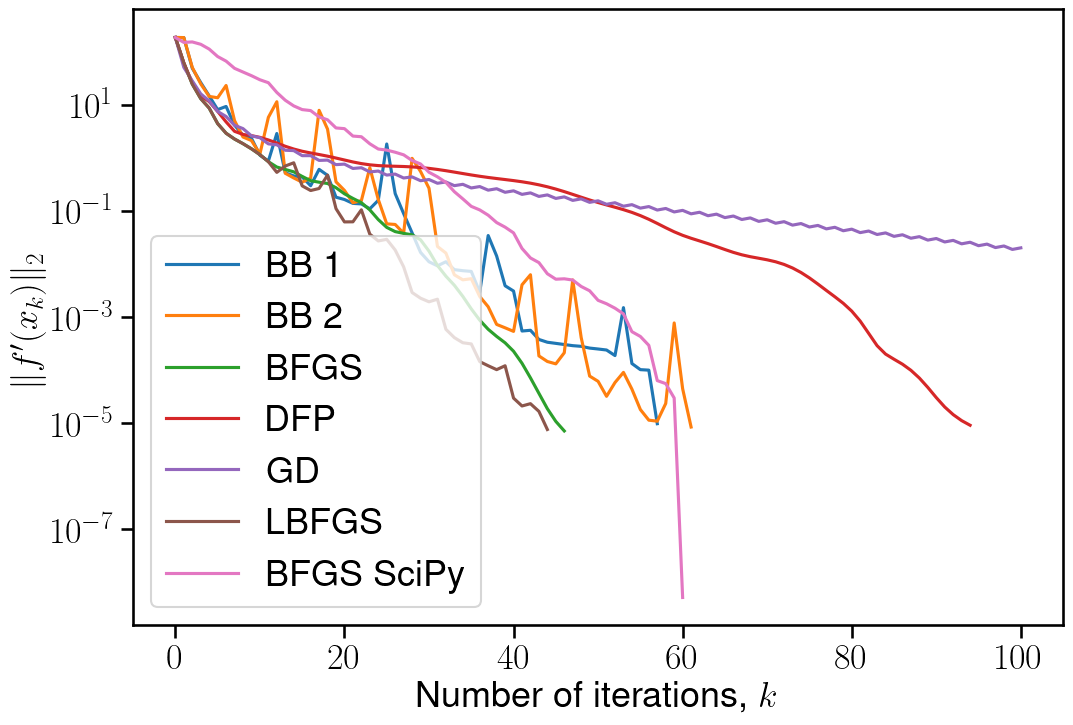

In [59]:
plt.figure(figsize=(12, 8))
fontsize = 26
for m in method:   
    plt.semilogy([np.linalg.norm(gradf(x)) for x in method[m].get_convergence()], label=m)

plt.semilogy([np.linalg.norm(gradf(x)) for x in [x0] + scopt_conv], label='BFGS SciPy')
plt.legend(fontsize=fontsize)
plt.ylabel("$\|f'(x_k)\|_2$", fontsize=fontsize)
plt.xlabel("Number of iterations, $k$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

### Особенности квазиньютоновских методов

Достоинства:
1. Вместо **точного** вычисления гессиана используется его **оценка**, полученная с помощью градиента и оценки гессиана в предыдущей точке
2. Вместо решения систем линейных уравнений используется текущаю информация о функции и градиенте для аналитического вычисления приближения обращённого гессиана
3. Сложность одной итерации $O(n^2) + ...$ по сравнению с $O(n^3) + ...$ в методе Ньютона
4. Для метода L-BFGS требуется линейное количество памяти по размерности задачи
5. Свойство самокоррекции метода BFGS: если на некоторой итерации обратный гессиан оценен очень грубо, то следующие несколько итераций улучшат оценку
6. Сверхлинейная сходимость к решению задачи минимизации $f$ (подробнее см. [[1]](http://www.bioinfo.org.cn/~wangchao/maa/Numerical_Optimization.pdf))

Недостатки:
1. Нет универсального рецепта выбора начального приближения $B_0$ или $H_0$
2. Не любое условие на линейный поиск шага гарантирует выполнения условия кривизны $y^{\top}_ks_k > 0$